### Data Visualization of titanic dataset using matplotlib and seaborn

#### Importing Libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [63]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
df=pd.read_csv('/content/drive/My Drive/datasets/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


Visualization of missing values in dataset

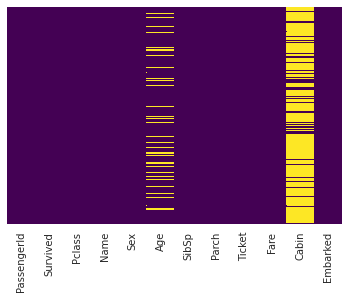

In [66]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

It has been observed that most of values in Cabin column are missing whereas some of the age values ae missing

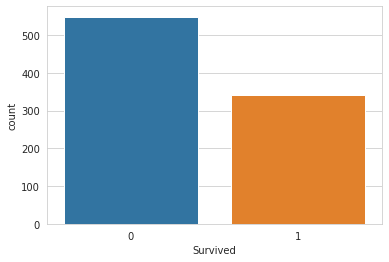

In [67]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df)

Visualization of survived people categorized by sex

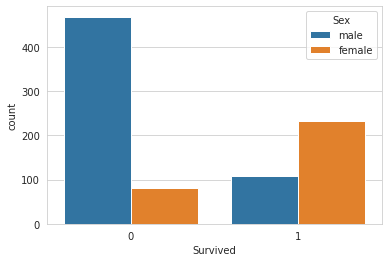

In [68]:
sns.set_style('whitegrid')
sns.countplot(x="Survived", hue='Sex', data=df)

Visualization of survived people categorized by passenger class

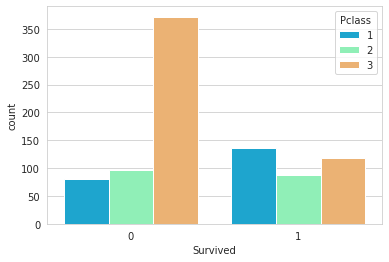

In [69]:
sns.set_style('whitegrid')
sns.countplot(x="Survived",hue="Pclass",data=df,palette='rainbow')

Age groups present on titanic


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


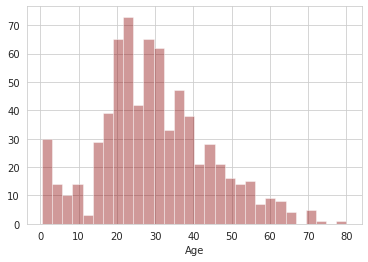

In [70]:
sns.distplot(df['Age'].dropna(), kde=False, color="darkred",bins=30)
#It is observed that most of the people suffering on titanic are in between age group of 20-30

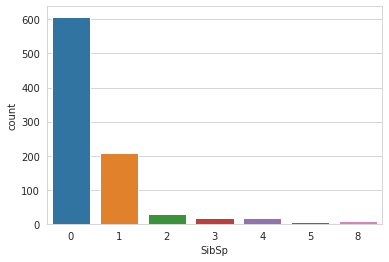

In [71]:
sns.countplot(x="SibSp", data=df)

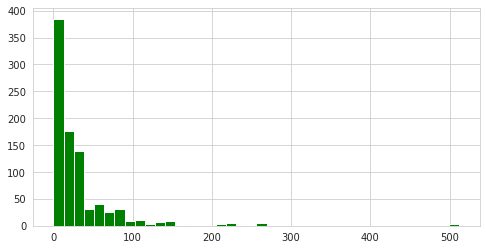

In [72]:
df['Fare'].hist(color='green', bins=40, figsize=(8,4))

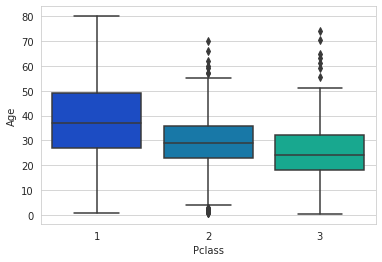

In [73]:
sns.boxplot(x='Pclass',y='Age',data=df, palette='winter')
#Finding which age group is found in Pclass so to fill the missing values of ages in Age column

Data cleaning i.e. finding missing values and converting categorical data to numerical one

In [74]:
def inpute_age(cols):
  Age=cols[0]
  Pclass=cols[1]

  if pd.isnull(Age):
    if Pclass==1:
      return 37
    elif Pclass==2:
      return 29
    else:
      return 24
  else:
    return Age

In [75]:
df["Age"]=df[['Age','Pclass']].apply(inpute_age,axis=1)

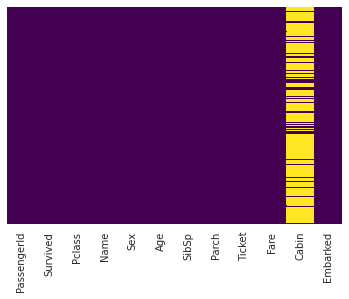

In [76]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [77]:
df.drop("Cabin",axis=1,inplace=True)

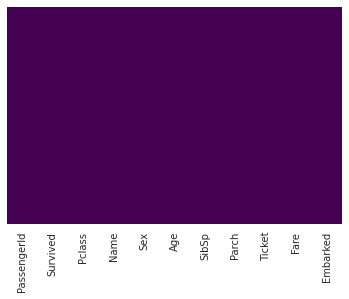

In [78]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [79]:
pd.get_dummies(df['Embarked'],drop_first=True, ).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [80]:
sex=pd.get_dummies(df['Sex'],drop_first=True,)
embark=pd.get_dummies(df['Embarked'],drop_first=True, )

In [81]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1, inplace=True)

In [83]:
df=pd.concat([df,sex,embark],axis=1)

In [84]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,24.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


### Visualizing correlation between different values



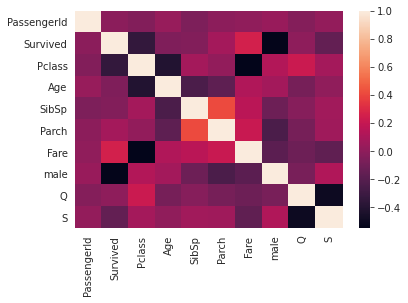

In [93]:
sns.heatmap(df.corr())


Visualizing pairwise relationship with pairplot

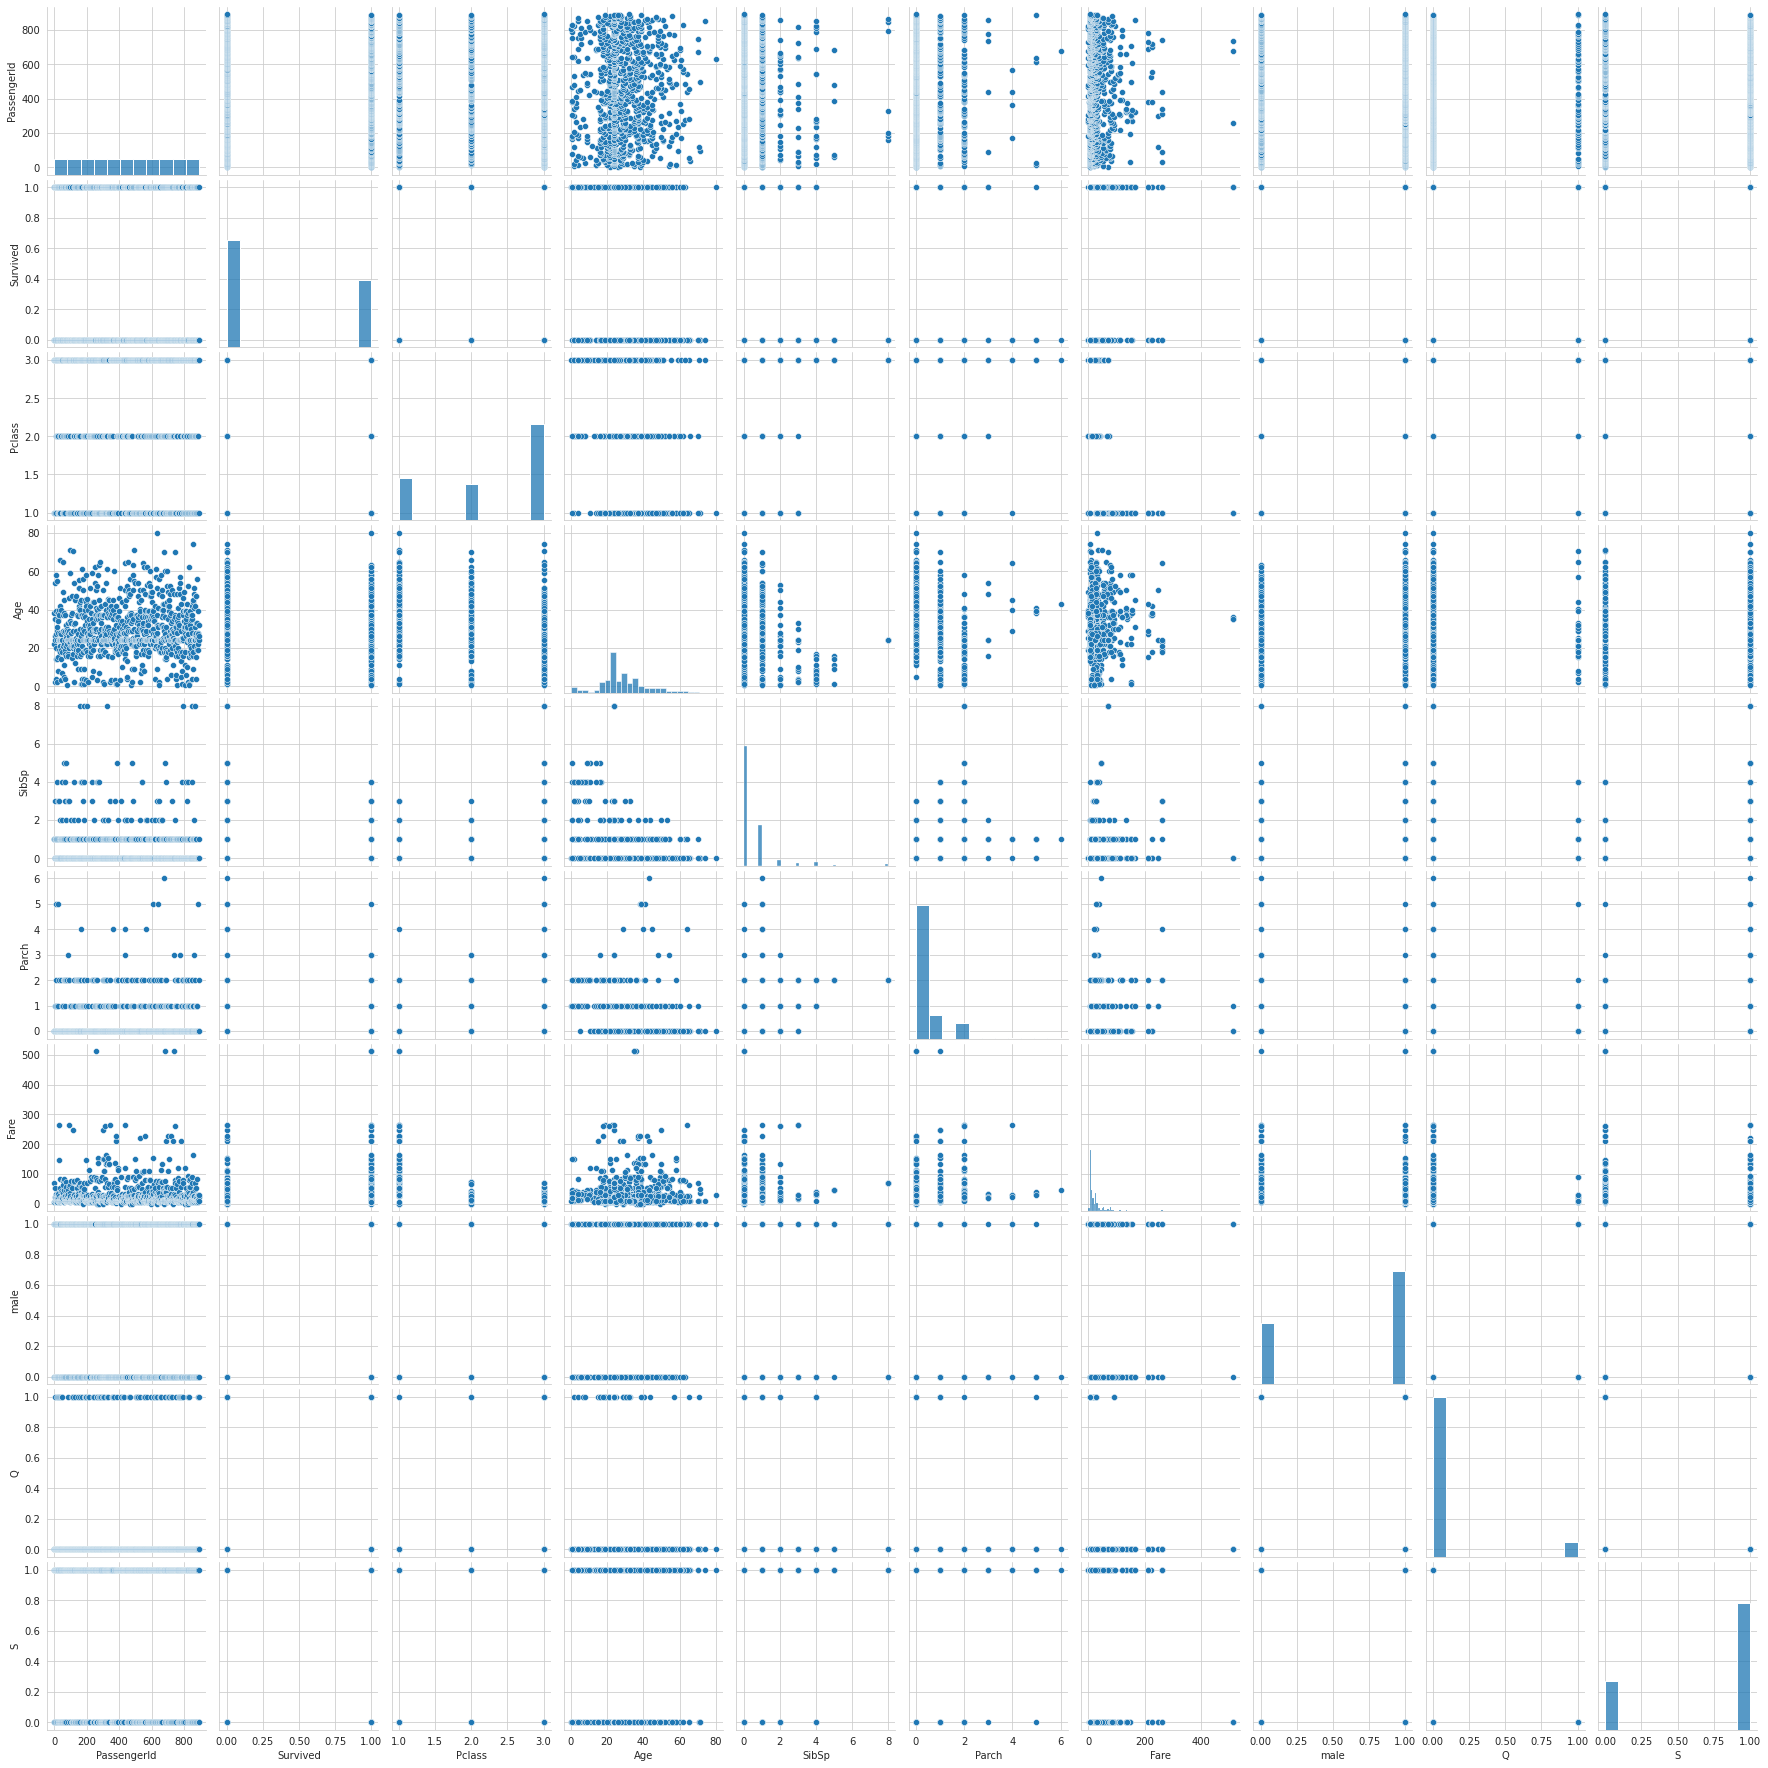

In [94]:
sns.pairplot(df)